In [1]:
import pandas as pd
import geopandas as gpd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
# PCA module
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.metrics import r2_score
import datetime

In [ ]:
# Save Memory
# Read CSV in chunksize
# drop irrelevant columns
# change data type

# data used
#'yellow_tripdata_2018-12.csv'
#'taxi_zones.csv'
#'yellow_airport_pickup' is processed to get only data from airport dropoff

In [2]:
r_dir = r'../raw_data/'
c_dir = r'../cleaned_data/'

In [ ]:
# read all December data
#yellow_12_2018 = pd.read_csv(r_dir+'yellow_tripdata_2018-12.csv')
#yellow_12_2018.head()

In [58]:
taxi_zone = pd.read_csv(r_dir+'taxi_zones.csv')
taxi_zone[taxi_zone.zone.str.contains('Airport$')]

,OBJECTID,Shape_Leng,the_geom,Shape_Area,zone,LocationID,borough
0,1,0.116357,MULTIPOLYGON (((-74.18445299999996 40.69499599...,0.000782,Newark Airport,1,EWR
136,132,0.245479,MULTIPOLYGON (((-73.8250346749999 40.663580133...,0.002038,JFK Airport,132,Queens
145,138,0.107467,MULTIPOLYGON (((-73.8712485624251 40.786038151...,0.000537,LaGuardia Airport,138,Queens


In [61]:
taxi_zone.shape

(263, 7)

In [14]:
# Location ID    Newark Airport:1  JFK: 132   LaGuardia: 138 

In [5]:
# select where pickup location as airports
ind = (yellow_12_2018['PULocationID'] == 1)|(yellow_12_2018['PULocationID'] == 132)|(yellow_12_2018['PULocationID'] == 138)
yellow_airport_pickup = yellow_12_2018[ind]
yellow_airport_pickup.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
5,1,2018-12-01 00:00:38,2018-12-01 00:29:26,1,18.80,1,N,132,97,1,50.5,0.5,0.5,10.35,0.00,0.3,62.15
10,1,2018-12-01 00:56:42,2018-12-01 01:22:35,1,17.30,2,N,132,170,1,52.0,0.0,0.5,10.00,5.76,0.3,68.56
67,2,2018-12-01 00:45:47,2018-12-01 01:14:10,1,19.27,1,N,132,66,1,51.5,0.5,0.5,10.56,0.00,0.3,63.36
71,1,2018-12-01 00:11:13,2018-12-01 00:48:13,1,20.00,2,N,132,166,1,52.0,0.0,0.5,5.86,5.76,0.3,64.42
112,1,2018-12-01 00:17:21,2018-12-01 00:32:00,2,8.00,1,N,138,162,2,23.0,0.5,0.5,0.00,5.76,0.3,30.06


In [ ]:
# Create dataframe with pickup count associated with each locationID
# Extract Pickups from top 10 most traveled identified from stats
# lineplot of hourly pattern from normal weekday, normal weekend, holiday weekday, holiday weekend.  
# Day of the week, Hour of a day. 

In [ ]:
yellow_airport_pickup.to_csv('yellow_airport_pickup.csv')

In [36]:
yellow_airport_pickup = pd.read_csv(c_dir+'yellow_airport_pickup.csv')

In [37]:
# Extract Datetime information
yellow_airport_pickup['dropoff_hour'] = [x[11:13] for x in yellow_airport_pickup['tpep_dropoff_datetime']]
yellow_airport_pickup['dropoff_day'] = [x[0:4]+x[5:7]+x[8:10] for x in yellow_airport_pickup['tpep_dropoff_datetime']]
yellow_airport_pickup['dropoff_hour']=yellow_airport_pickup['dropoff_hour'].astype(int)
yellow_airport_pickup['dropoff_day']=yellow_airport_pickup['dropoff_day'].astype(int)

In [38]:
yellow_airport_pickup.dtypes

Unnamed: 0                 int64
VendorID                   int64
tpep_pickup_datetime      object
tpep_dropoff_datetime     object
passenger_count            int64
trip_distance            float64
RatecodeID                 int64
store_and_fwd_flag        object
PULocationID               int64
DOLocationID               int64
payment_type               int64
fare_amount              float64
extra                    float64
mta_tax                  float64
tip_amount               float64
tolls_amount             float64
improvement_surcharge    float64
total_amount             float64
dropoff_hour               int64
dropoff_day                int64
dtype: object

In [39]:
# extract date 20181218 to 20181231
ind = (yellow_airport_pickup['dropoff_day'] >= 20181218) & (yellow_airport_pickup['dropoff_day'] <= 20181231)
Holiday_dropoff = yellow_airport_pickup[ind]
Holiday_dropoff.head()

,Unnamed: 0,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,dropoff_hour,dropoff_day
199917,4042339,2,2018-12-27 16:48:57,2018-12-27 17:13:28,1,8.92,1,N,138,244,2,28.0,1.0,0.5,0.00,5.76,0.3,35.56,17,20181227
225716,4702602,2,2018-12-17 00:07:40,2018-12-18 00:00:00,1,12.38,1,N,132,180,2,37.0,0.5,0.5,0.00,0.00,0.3,38.30,0,20181218
225907,4704256,2,2018-12-17 00:33:42,2018-12-18 00:13:33,4,20.87,2,N,132,229,1,52.0,0.0,0.5,14.64,5.76,0.3,73.20,0,20181218
226510,4713633,2,2018-12-17 05:37:43,2018-12-18 05:14:42,1,17.77,2,N,132,186,1,52.0,0.0,0.5,11.71,5.76,0.3,70.27,5,20181218
227138,4729738,2,2018-12-17 07:24:12,2018-12-18 07:07:33,1,16.35,1,N,138,88,1,47.0,0.0,0.5,10.71,5.76,0.3,64.27,7,20181218


In [40]:
# extract date 20181201 to 20181217
ind2 = (yellow_airport_pickup['dropoff_day'] >= 20181201) & (yellow_airport_pickup['dropoff_day'] <= 20181217)
pre_Holiday_dropoff = yellow_airport_pickup[ind2]

In [41]:
tzs=gpd.read_file(r_dir+'taxi_zones/taxi_zones.shp')
tzs.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


In [42]:
# which zones have most drop off in the given time interval? Aggregate by passenger count sum
Holiday_sum_agg = Holiday_dropoff.groupby('DOLocationID').count()
pre_Holiday_sum_agg = pre_Holiday_dropoff.groupby('DOLocationID').count()
# merge with taxi zone
tzs_yellow_Holiday =tzs.merge(Holiday_sum_agg, left_on = 'LocationID', right_on ='DOLocationID' )
tzs_yellow_preHoliday =tzs.merge(pre_Holiday_sum_agg, left_on = 'LocationID', right_on ='DOLocationID' )

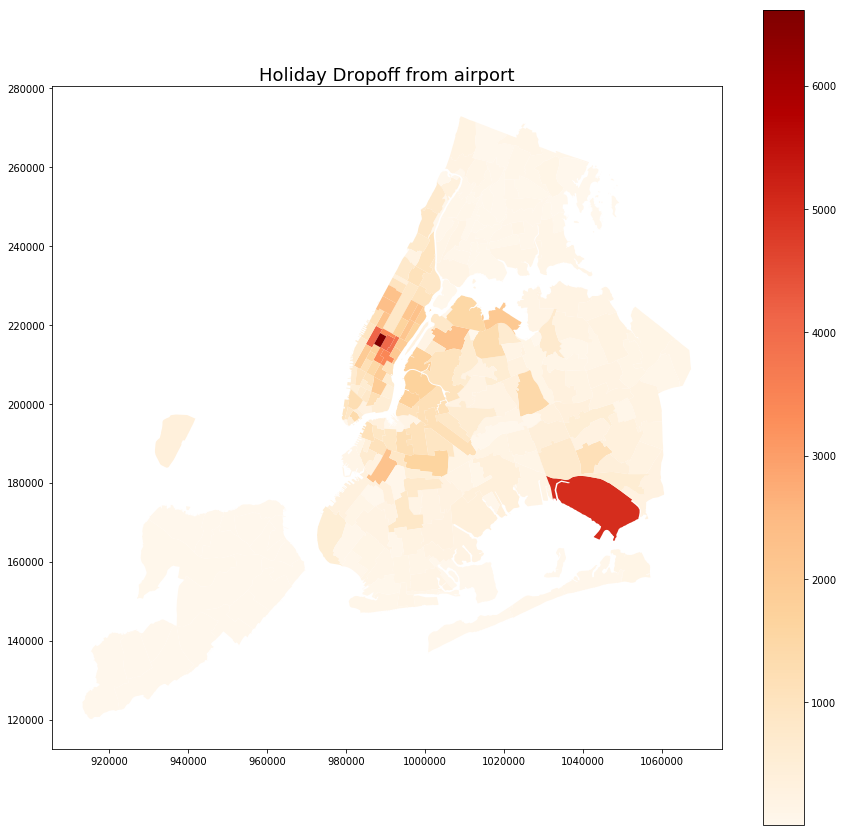

In [43]:
f,ax = plt.subplots(1, figsize=(15,15))
ax.set_title('Holiday Dropoff from airport', fontsize=18)
tzs_yellow_Holiday_log = tzs_yellow_Holiday.copy()
tzs_yellow_Holiday_log['passenger_count'] = np.log(tzs_yellow_Holiday_log['passenger_count'])
#tzs_yellow_Holiday_log.plot(axes=ax[0], column = 'passenger_count', legend = True, cmap = "OrRd")
tzs_yellow_Holiday.plot(axes=ax, column = 'passenger_count', legend = True, cmap = "OrRd")

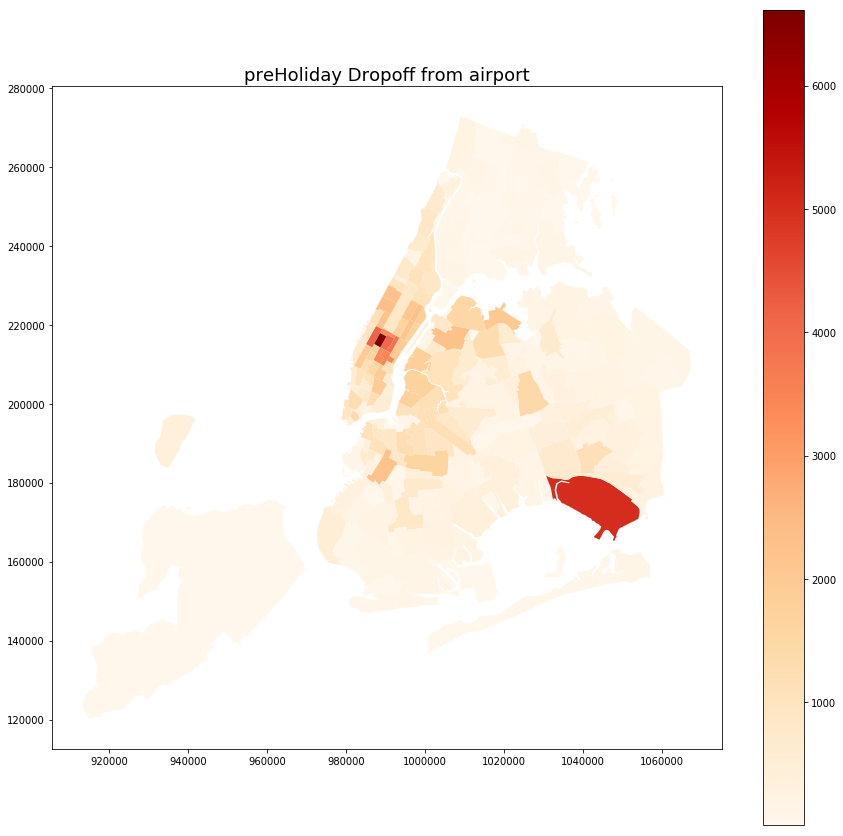

In [44]:

tzs_yellow_preHoliday_log = tzs_yellow_preHoliday.copy()
tzs_yellow_preHoliday_log['passenger_count'] = np.log(tzs_yellow_preHoliday_log['passenger_count'])
f,ax = plt.subplots(1, figsize=(15,15))
ax.set_title('preHoliday Dropoff from airport', fontsize=18)
#tzs_yellow_preHoliday_log.plot(axes=ax[1], column = 'passenger_count', legend = True, cmap = "OrRd")
tzs_yellow_Holiday.plot(axes=ax, column = 'passenger_count', legend = True, cmap = "OrRd")

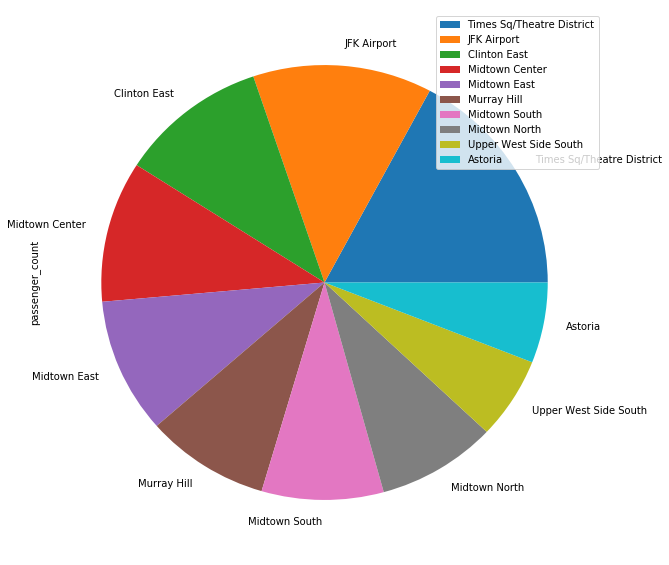

In [45]:
# Top 10 dropoff Locations
top10_1 = tzs_yellow_Holiday.nlargest(10,'passenger_count')[['passenger_count','LocationID','zone','borough']]
top10_1_pie = top10_1.set_index('zone')
top10_1_pie.plot.pie(y='passenger_count', figsize=(10, 10))

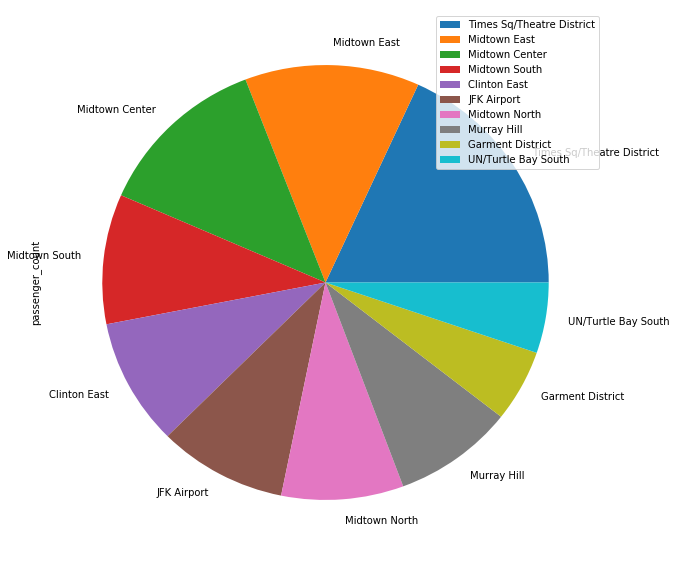

In [46]:
top10_2 = tzs_yellow_preHoliday.nlargest(10,'passenger_count')[['passenger_count','LocationID','zone','borough']]
top10_2_pie = top10_2.set_index('zone')
top10_2_pie.plot.pie(y='passenger_count', figsize=(10, 10))

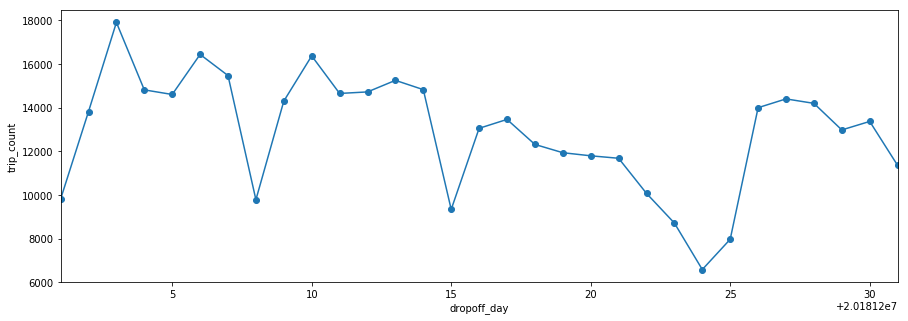

In [47]:
# Count number of trips from airport in December

ind = (yellow_airport_pickup['dropoff_day'] >= 20181201) & (yellow_airport_pickup['dropoff_day'] <= 20181231)

day_count = yellow_airport_pickup[ind]
day_count = day_count.groupby('dropoff_day').count().dropoff_hour
day_count.rename(columns={'dropoff_day':'trip_count'},inpl)
ax = day_count.plot(x='dropoff_day', y='trip_count', kind='line', style="-o", figsize=(15,5))
ax.set_ylabel("trip_count")
plt.show()

# See change in pattern Starting December 15 

In [48]:
# part of processing step convert to datetime object
yellow_airport_pickup['tpep_pickup_datetime'] = pd.to_datetime(yellow_airport_pickup['tpep_pickup_datetime'],format ='%Y-%m-%d %H:%M:%S.%f')
yellow_airport_pickup['tpep_dropoff_datetime'] = pd.to_datetime(yellow_airport_pickup['tpep_dropoff_datetime'],format ='%Y-%m-%d %H:%M:%S.%f')


In [49]:
# get only essential columns
essential = ['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','PULocationID','DOLocationID','dropoff_hour','dropoff_day']
yellow_airport_pickup = yellow_airport_pickup[essential]
yellow_airport_pickup.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,PULocationID,DOLocationID,dropoff_hour,dropoff_day
0,2018-12-01 00:00:38,2018-12-01 00:29:26,1,18.80,132,97,0,20181201
1,2018-12-01 00:56:42,2018-12-01 01:22:35,1,17.30,132,170,1,20181201
2,2018-12-01 00:45:47,2018-12-01 01:14:10,1,19.27,132,66,1,20181201
3,2018-12-01 00:11:13,2018-12-01 00:48:13,1,20.00,132,166,0,20181201
4,2018-12-01 00:17:21,2018-12-01 00:32:00,2,8.00,138,162,0,20181201


<function matplotlib.pyplot.title>

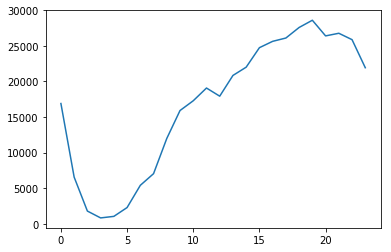

In [50]:
# hourly change aggregate over a month
hourcount = yellow_airport_pickup.groupby('dropoff_hour').count().passenger_count
hour = yellow_airport_pickup.groupby('dropoff_hour').count().index
plt.plot(hour,hourcount) 
plt.title         

In [51]:
yellow_11_2018 = pd.read_csv(r_dir+'yellow_tripdata_2018-11.csv')

In [52]:
# get essential columns, convert data type
essential = ['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','PULocationID','DOLocationID']
yellow_11_2018 = yellow_11_2018[essential]
yellow_11_2018.to_csv('yellow_11_2018.csv')
# extract from airport pickup
ind = (yellow_11_2018['PULocationID'] == 1)|(yellow_11_2018['PULocationID'] == 132)|(yellow_11_2018['PULocationID'] == 138)
yellow_airport_pickup_201811 = yellow_11_2018[ind]


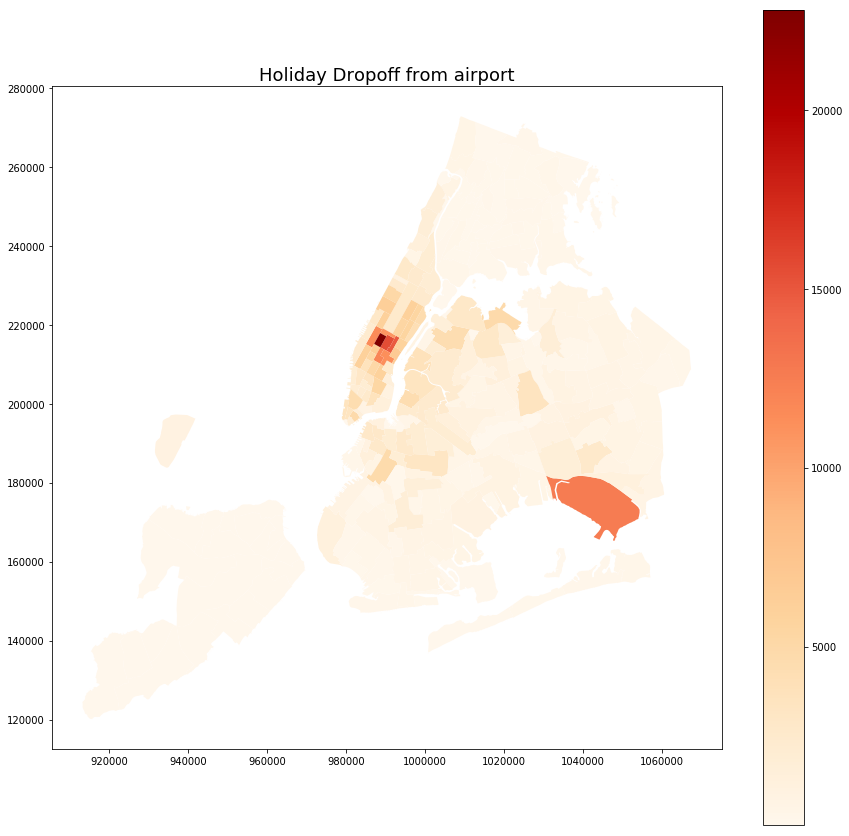

In [53]:
# count number of trips based on location
#ind = (yellow_airport_pickup_201811['dropoff_day'] >= 20181218) & (yellow_airport_pickup['dropoff_day'] <= 20181231)
#Holiday_dropoff = yellow_airport_pickup[ind]
Holiday_trip_agg = yellow_airport_pickup_201811.groupby('DOLocationID').count()
tzs_yellow_Holiday =tzs.merge(Holiday_trip_agg, left_on = 'LocationID', right_on ='DOLocationID' )
f,ax = plt.subplots(1, figsize=(15,15))
ax.set_title('Holiday Dropoff from airport', fontsize=18)
tzs_yellow_Holiday.plot(axes=ax, column = 'passenger_count', legend = True, cmap = "OrRd")

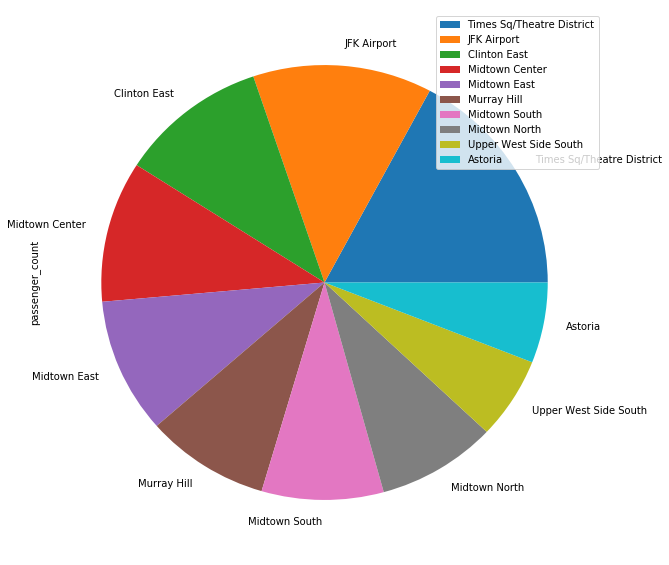

In [54]:
top10_11 = tzs_yellow_Holiday.nlargest(10,'passenger_count')[['passenger_count','LocationID','zone','borough']]
top10_11_pie = top10_1.set_index('zone')
top10_11_pie.plot.pie(y='passenger_count', figsize=(10, 10))

In [55]:
# November
top10_11

,passenger_count,LocationID,zone,borough
222,22794,230,Times Sq/Theatre District,Manhattan
154,15533,161,Midtown Center,Manhattan
155,14865,162,Midtown East,Manhattan
125,12577,132,JFK Airport,Queens
157,11944,164,Midtown South,Manhattan
46,11509,48,Clinton East,Manhattan
163,11297,170,Murray Hill,Manhattan
156,10857,163,Midtown North,Manhattan
225,6856,233,UN/Turtle Bay South,Manhattan
97,6519,100,Garment District,Manhattan


In [62]:
#pre holiday December   Midtown Center down, Midtown Up,  JFK down, Clinton East up 
top10_2

,passenger_count,LocationID,zone,borough
221,14310,230,Times Sq/Theatre District,Manhattan
154,9961,162,Midtown East,Manhattan
153,9910,161,Midtown Center,Manhattan
156,7594,164,Midtown South,Manhattan
46,7405,48,Clinton East,Manhattan
124,7337,132,JFK Airport,Queens
155,6965,163,Midtown North,Manhattan
162,6885,170,Murray Hill,Manhattan
96,4209,100,Garment District,Manhattan
224,4126,233,UN/Turtle Bay South,Manhattan


In [61]:
# Holiday December
top10_1

,passenger_count,LocationID,zone,borough
222,6613,230,Times Sq/Theatre District,Manhattan
125,4997,132,JFK Airport,Queens
46,4138,48,Clinton East,Manhattan
154,4036,161,Midtown Center,Manhattan
155,3866,162,Midtown East,Manhattan
163,3459,170,Murray Hill,Manhattan
157,3397,164,Midtown South,Manhattan
156,3337,163,Midtown North,Manhattan
231,2337,239,Upper West Side South,Manhattan
5,2300,7,Astoria,Queens


In [ ]:
# processing pipleline to produce dataframe containing Passenger count, PULlocation datetime, DOLocationID datetime, 
# 'tpep_pickup_datetime','tpep_dropoff_datetime'

In [ ]:
# Features for regression 
# classification/clustering of weekend/weekday/Holiday , 

In [3]:
fhv_2018_11 = pd.read_csv(r_dir+'fhv_tripdata_2018-11.csv')

In [4]:
fhv_2018_11.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_number,Dispatching_base_num
0,2018-11-30 15:36:17,2018-11-30 15:47:07,226.0,260.0,NaN,B02510,NaN
1,2018-11-30 15:36:18,2018-11-30 16:05:37,121.0,10.0,NaN,B02510,NaN
2,2018-11-30 15:36:18,2018-11-30 15:58:02,211.0,40.0,NaN,B02510,NaN
3,2018-11-30 15:36:20,2018-11-30 16:59:23,132.0,170.0,NaN,B02510,NaN
4,2018-11-30 15:36:20,2018-11-30 15:46:32,189.0,25.0,NaN,B02510,NaN


In [5]:
fhv_base = pd.read_csv(c_dir+'fhv_bases.csv')
fhv_base.head()

,base_number,base_name,dba,dba_category
0,B00001,LONDON TOWNCARS INC,NaN,other
1,B00008,T-D MAINTENANCE CORP,FOUR ONES CAR SERVICE,other
2,B00009,T-D MAINTENANCE,FOUR ONES CAR SERVICE,other
3,B00013,LOVE CORPORATE CAR INC,NaN,other
4,B00014,NY ONE CORP CAR INC,NaN,other


In [15]:
fhv_2018_11_m = fhv_2018_11.merge(fhv_base[['base_number','dba_category']], how = 'inner',left_on = 'Dispatching_base_number',right_on= 'base_number')


,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_number,Dispatching_base_num,base_number,dba_category
0,2018-11-30 15:36:17,2018-11-30 15:47:07,226.0,260.0,NaN,B02510,NaN,B02510,lyft
1,2018-11-30 15:36:18,2018-11-30 16:05:37,121.0,10.0,NaN,B02510,NaN,B02510,lyft
2,2018-11-30 15:36:18,2018-11-30 15:58:02,211.0,40.0,NaN,B02510,NaN,B02510,lyft
3,2018-11-30 15:36:20,2018-11-30 16:59:23,132.0,170.0,NaN,B02510,NaN,B02510,lyft
4,2018-11-30 15:36:20,2018-11-30 15:46:32,189.0,25.0,NaN,B02510,NaN,B02510,lyft


In [16]:
fhv_2018_11_m = fhv_2018_11_m[fhv_2018_11_m.dba_category != 'other'] 

In [18]:
ind = (fhv_2018_11_m['PUlocationID'] == 1)|(fhv_2018_11_m['PUlocationID'] == 132)|(fhv_2018_11_m['PUlocationID'] == 138)
fhv_airport_pickup_11 = fhv_2018_11_m[ind]

In [20]:
fhv_airport_pickup_11.to_csv('fhv_airport_pickup_11.csv')

In [21]:
fhv_airport_pickup_11.head()

,Pickup_DateTime,DropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Dispatching_base_number,Dispatching_base_num,base_number,dba_category
3,2018-11-30 15:36:20,2018-11-30 16:59:23,132.0,170.0,NaN,B02510,NaN,B02510,lyft
23,2018-11-30 15:36:29,2018-11-30 17:30:28,132.0,265.0,NaN,B02510,NaN,B02510,lyft
40,2018-11-30 15:36:37,2018-11-30 16:26:23,138.0,238.0,NaN,B02510,NaN,B02510,lyft
47,2018-11-30 15:36:40,2018-11-30 16:55:21,132.0,233.0,NaN,B02510,NaN,B02510,lyft
69,2018-11-30 15:36:56,2018-11-30 18:09:20,138.0,265.0,NaN,B02510,NaN,B02510,lyft


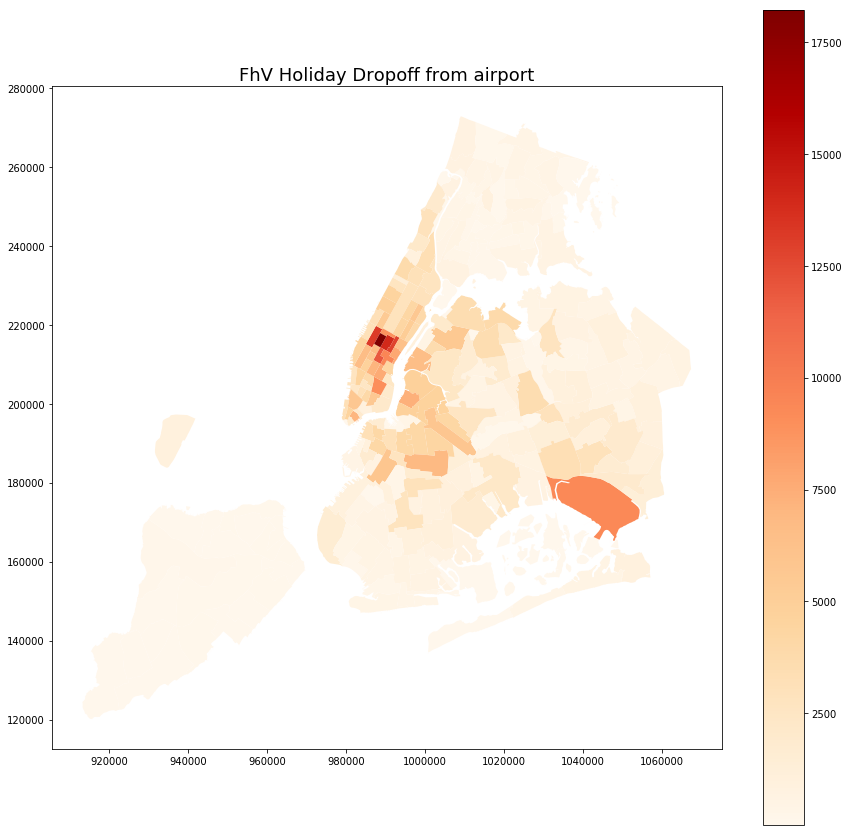

In [24]:

Nov_fhv_agg = fhv_airport_pickup_11.groupby('DOlocationID').count()
tzs_FHV_Nov =tzs.merge(Nov_fhv_agg, left_on = 'LocationID', right_on ='DOlocationID' )
f,ax = plt.subplots(1, figsize=(15,15))
ax.set_title('FhV Holiday Dropoff from airport', fontsize=18)
tzs_FHV_Nov.plot(axes=ax, column = 'PUlocationID', legend = True, cmap = "OrRd")

In [28]:
tzs_FHV_Nov.nlargest(10,'PUlocationID')[['zone','borough']]

,zone,borough
224,Times Sq/Theatre District,Manhattan
156,Midtown Center,Manhattan
47,Clinton East,Manhattan
157,Midtown East,Manhattan
159,Midtown South,Manhattan
165,Murray Hill,Manhattan
127,JFK Airport,Queens
78,East Village,Manhattan
158,Midtown North,Manhattan
227,UN/Turtle Bay South,Manhattan


In [31]:
bar_fhv = tzs_FHV_Nov.nlargest(10,'PUlocationID')[['zone','PUlocationID']]

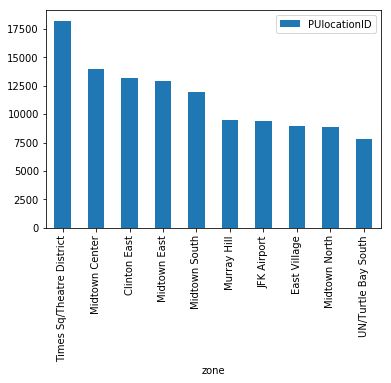

In [33]:
# FHV November
bar_fhv.plot.bar(x='zone',y='PUlocationID')

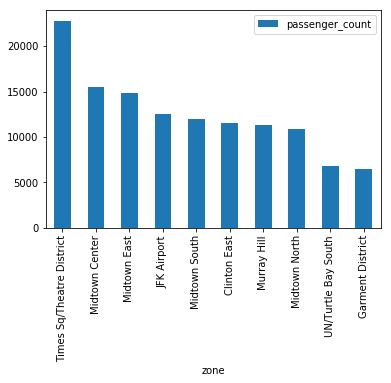

In [56]:
# Taxi November
top10_11.plot.bar(x='zone',y='passenger_count')

In [ ]:
# function to extract airport pickup trips from raw data
def airport_pickup(df,flag):
    # flag 1: from yellow tax,  flag 2: from fhv
    # get essential columns, convert data type
    if flag == 1:
        essential = ['tpep_pickup_datetime','tpep_dropoff_datetime','passenger_count','trip_distance','PULocationID','DOLocationID']
        df = df[essential]
        # extract from airport pickup
        ind = (df['PULocationID'] == 1)|(df['PULocationID'] == 132)|(df['PULocationID'] == 138)
    
    if flag == 2:
        essential = ['Pickup_DateTime','DropOff_datetime','PUlocationID','DOlocationID']
        ind = (df['PUlocationID'] == 1)|(df['PUlocationID'] == 132)|(df['PUlocationID'] == 138)
        
    
    return df[ind]

In [ ]:
def mapmerge_plot(df,flag):
    tzs_yellow_Holiday =tzs.merge(Holiday_trip_agg, left_on = 'LocationID', right_on ='DOLocationID' )

In [ ]:
# apply datetimeprocessing after location filtering
def datetimeprocessing (df,flag):

In [ ]:
def lineplot(df,flag):